# EDA on Netflix Data 
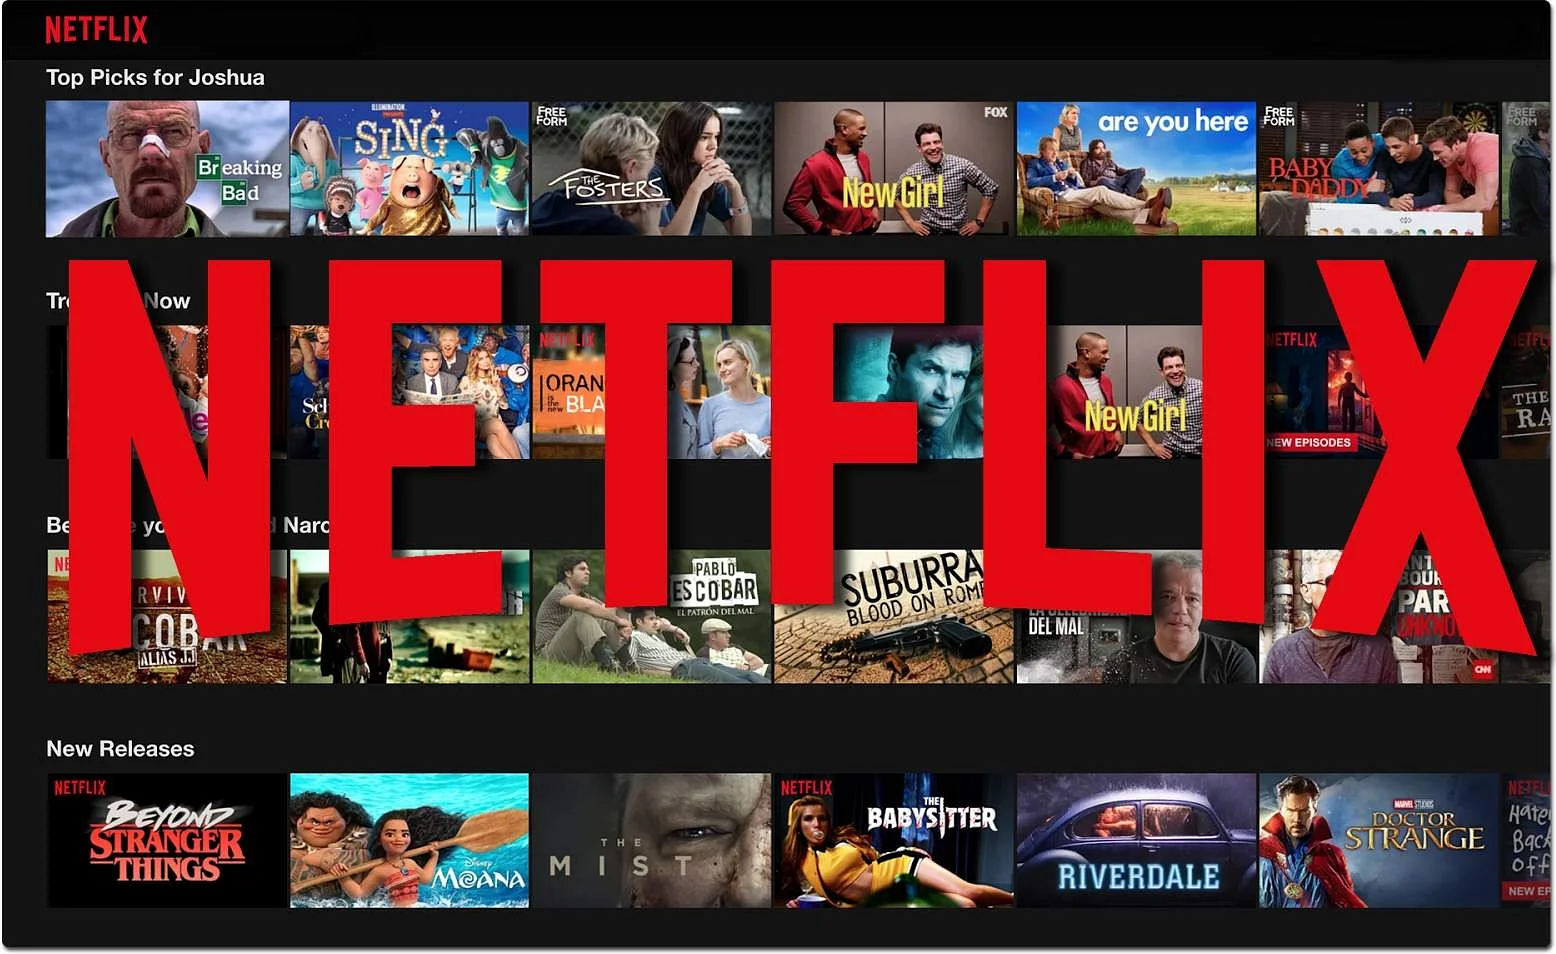

In [1]:
%%time
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

netflix = pd.read_csv(r"C:\Users\suyashi144893\Documents\data Sets\netflix_data.csv")
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Wall time: 1.56 s


In [3]:
netflix.shape

(8807, 12)

# About Data
### This dataset contains data collected from Netflix of different TV shows and movies from the year 2008 to 2021.

- type: Gives information about 2 different unique values one is TV Show and another is Movie
- title: Gives information about the title of Movie or TV Show
- director: Gives information about the director who directed the Movie or TV Show
- cast: Gives information about the cast who plays role in Movie or TV Show
- release_year: Gives information about the year when Movie or TV Show was released
- rating: Gives information about the Movie or TV Show are in which category (eg like the movies are only for students, or adults, etc)
- duration: Gives information about the duration of Movie or TV Show
- listed_in: Gives information about the genre of Movie or TV Show
- description: Gives information about the description of Movie or TV Show

In [2]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## Data Prepartion
- Check Missing Values 

In [3]:
m=netflix.isnull().sum()
miss= (netflix.isnull().sum()/len(netflix))*100
miss_data=pd.concat([m,miss],axis=1,keys=['Total','%'])
print(miss_data)

              Total          %
show_id           0   0.000000
type              0   0.000000
title             0   0.000000
director       2634  29.908028
cast            825   9.367549
country         831   9.435676
date_added       10   0.113546
release_year      0   0.000000
rating            4   0.045418
duration          3   0.034064
listed_in         0   0.000000
description       0   0.000000


## Dropping the cast and director features because we are not going to use those features right now


In [4]:
netflix = netflix.dropna( how='any',subset=['cast', 'director'])

In [5]:
netflix.fillna({ 'country': 'missing', 'rating': 'missing'}, inplace=True)
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [6]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [7]:
## Finding how many unique values are there in the dataset
netflix.nunique()

show_id         5700
type               2
title           5700
director        4152
cast            5512
country          605
date_added      1478
release_year      72
rating            18
duration         205
listed_in        346
description     5677
dtype: int64

# EDA

-  What different types of show or movie are uploaded on Netflix?

- Correlation between the features
- Most watched shows on the Netflix
- Distribution of Ratings
- Which has the highest rating Tv show or Movies
- Finding the best Month for releasing content
- Highest watched genres on Netflix
- Released movie over the years

In [8]:
netflix.type.value_counts().to_frame('values_count')

,values_count
Movie,5522
TV Show,178


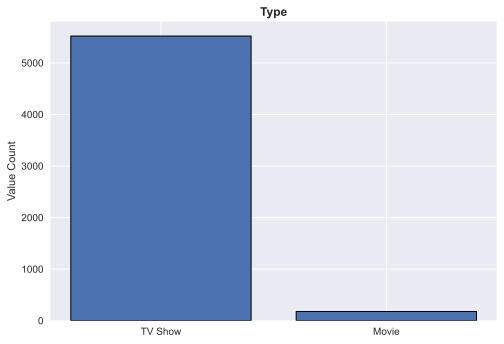

In [11]:
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')
fig, ax = plt.subplots()
plot = ax.bar(netflix.type.unique(), netflix.type.value_counts(), edgecolor="black", linewidth=1)
ax.set_ylabel('Value Count')
#ax.bar_label(plot, padding=-15, color='white')
ax.set_title('Type', fontweight='bold');